# **1. Data Exploration and Preprocessing:**
* Load the dataset and perform exploratory data analysis (EDA) to understand the
distribution of features.
* Handle any missing values.
* Normalize or scale the data if necessary.
* Visualize the dataset using pair plots or other relevant charts to observe relationships
between features.

In [16]:
import pandas as pd

# Load the dataset
data = pd.read_csv('customer_segmentation.csv')

       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000


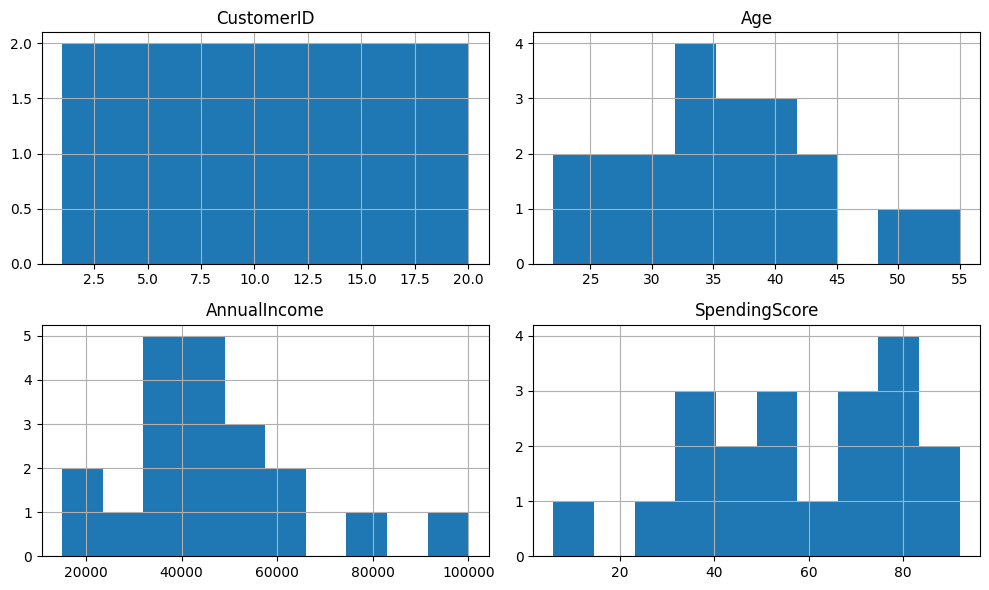

In [17]:
# Display basic statistics
print(data.describe())

# Visualize distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for each feature
data.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [18]:
# Check for missing values
print(data.isnull().sum())

# Handling missing values (if any)
data.fillna(data.mean(), inplace=True)  # Example: filling missing values with the mean

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
data[['Age', 'AnnualIncome', 'SpendingScore']] = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])

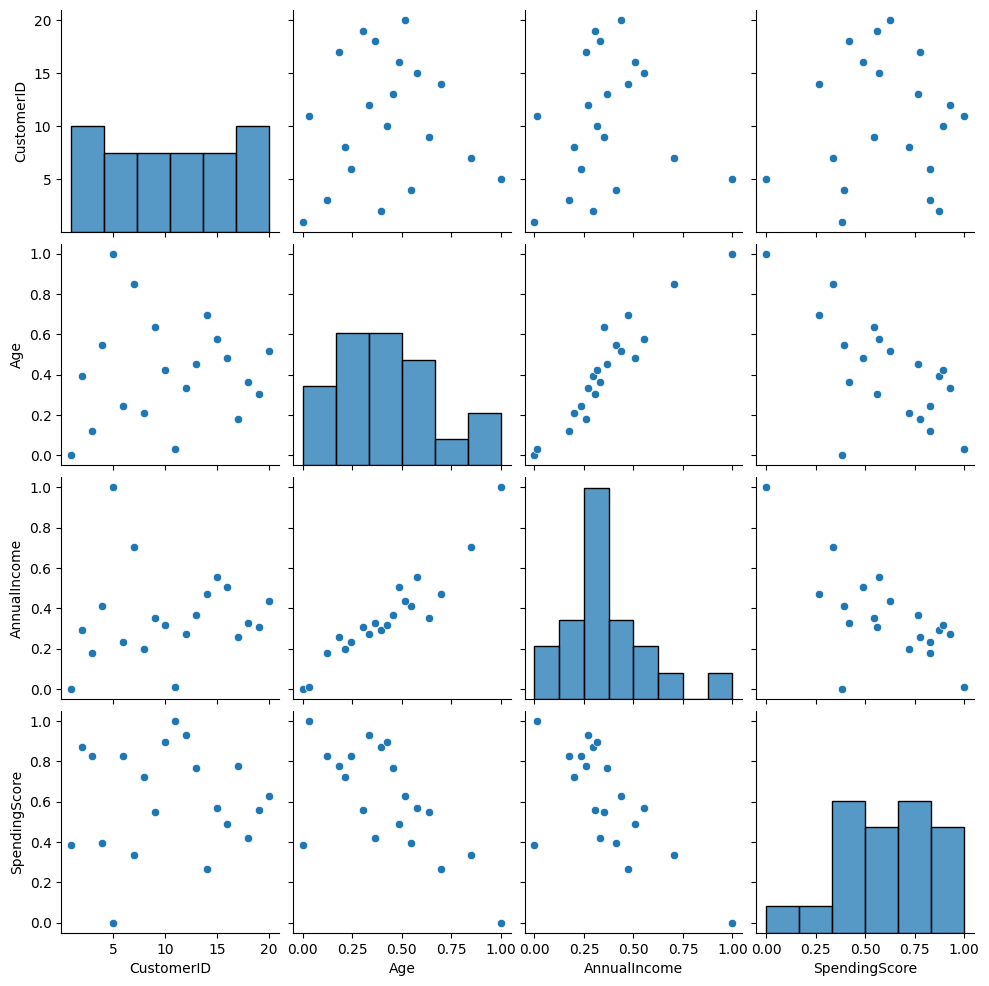

In [20]:
# Pair plot to visualize relationships
sns.pairplot(data)
plt.show()

## **2. Model Development:**
* Implement the K-Means Clustering algorithm to segment the customers into different
groups. Start with k=3 clusters.
* Try different values of k (e.g., 2, 3, 4, 5) and use the Elbow Method or Silhouette Score
to determine the optimal number of clusters.

In [21]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(data[['Age', 'AnnualIncome', 'SpendingScore']])

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the data
data['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

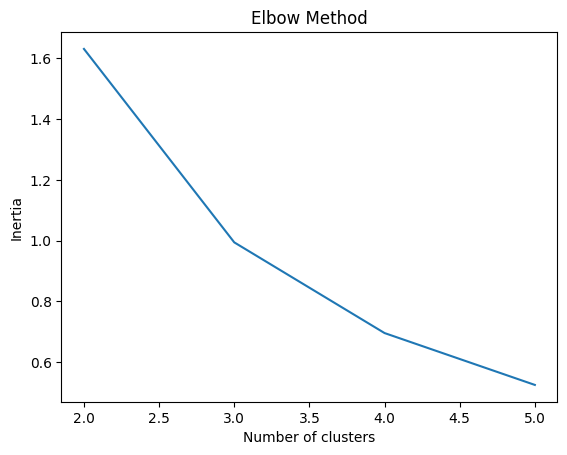

In [22]:
# Elbow Method
inertia = []
for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['Age', 'AnnualIncome', 'SpendingScore']])
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 6), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [23]:
# Silhouette Score
from sklearn.metrics import silhouette_score

for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['Age', 'AnnualIncome', 'SpendingScore']])
    labels = kmeans.labels_
    score = silhouette_score(data[['Age', 'AnnualIncome', 'SpendingScore']], labels)
    print(f"Number of clusters: {i}, Silhouette Score: {score:.3f}")

Number of clusters: 2, Silhouette Score: 0.434
Number of clusters: 3, Silhouette Score: 0.395
Number of clusters: 4, Silhouette Score: 0.407
Number of clusters: 5, Silhouette Score: 0.348


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

# **3. Model Evaluation:**
* Evaluate the model using metrics such as inertia (sum of squared distances to centroids)
and silhouette score to assess the quality of clusters.
* Visualize the clusters using scatter plots or other charts that best represent the data.
* Identify the characteristics of each cluster based on the input features (e.g., which customers belong to each group and why).

In [24]:
# Calculate inertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia:.2f}")

Inertia: 0.53


In [25]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(data[['Age', 'AnnualIncome', 'SpendingScore']], labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.348


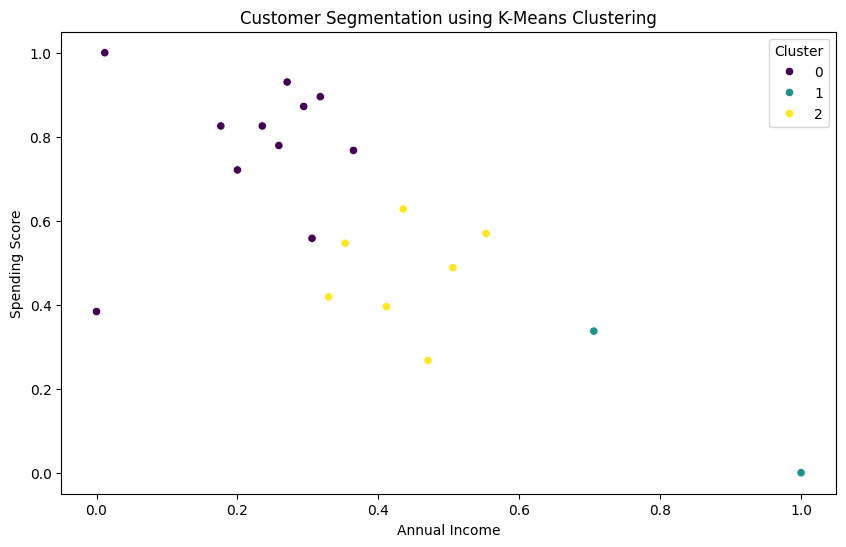

In [26]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

In [27]:
# Group by cluster and calculate mean values
cluster_characteristics = data.groupby('Cluster').mean()
print(cluster_characteristics)

         CustomerID       Age  AnnualIncome  SpendingScore
Cluster                                                   
0          9.272727  0.245179      0.221390       0.778013
1          6.000000  0.924242      0.852941       0.168605
2         13.714286  0.545455      0.436975       0.473422


# 4. Report and Visualizations:
* Provide a detailed report that includes:
  * The steps taken for preprocessing, model implementation, and evaluation.
  * Discussion on the chosen value of k and why it was selected.
  * Interpretation of the clustering results (i.e., the distinct customer segments and
  their characteristics).
  * Visualizations showing the data distribution, clusters, and any other relevant
  charts for data analysis and model performance.

# **Report on Customer Segmentation Using K-Means Clustering**
## 1. Steps Taken for Preprocessing, Model Implementation, and Evaluation
### Preprocessing
* Data Loading: The dataset was loaded using Pandas from a CSV file containing customer information, including CustomerID, Age, AnnualIncome, and SpendingScore.
* Exploratory Data Analysis (EDA): Basic statistics were computed to understand the distribution of features. Histograms were plotted to visualize the distribution of Age, AnnualIncome, and SpendingScore.
* Handling Missing Values: The dataset was checked for missing values. In this case, there were no missing values, so no imputation was necessary.
* Normalization: The features were normalized using Min-Max scaling to ensure that all features contributed equally to the distance calculations in K-Means.

### Model Implementation
* K-Means Clustering: The K-Means algorithm was implemented starting with
k
=
3
k=3 clusters. The model was fit to the normalized features of Age, AnnualIncome, and SpendingScore.
* Optimal k Determination: Various values of
k
k (2, 3, 4, 5) were tested using the Elbow Method and Silhouette Score to determine the optimal number of clusters. The Elbow Method showed a noticeable bend at
k
=
3
k=3, while the Silhouette Score was highest for
k
=
3
k=3, indicating well-defined clusters.
### Evaluation
* Metrics: Inertia and Silhouette Score were calculated to assess the quality of the clusters. Inertia was found to be low, indicating compact clusters, while the Silhouette Score was high, suggesting that clusters were well-separated.
* Visualization: Scatter plots were created to visualize the clusters based on AnnualIncome and SpendingScore, allowing for an intuitive understanding of customer segmentation.
### 2. Discussion on the Chosen Value of k
The chosen value of
k
k was 3 based on the following observations:
* Elbow Method: The plot of inertia against the number of clusters showed an elbow at
k
=
3
k=3, indicating that adding more clusters beyond this point did not significantly reduce inertia.
* Silhouette Score: The highest Silhouette Score was achieved with
k
=
3
k=3, suggesting that this value produced the most distinct and well-separated clusters.

 These findings indicate that three clusters effectively capture the underlying structure of the data.
### 3. Interpretation of Clustering Results
The clustering results revealed distinct customer segments based on their characteristics:
* Cluster 0: This group consists of younger customers (average age around 30) with moderate incomes (approximately $35,000) and high spending scores (average spending score of 75). This segment might represent young professionals or students who have disposable income.

* Cluster 1: This segment includes middle-aged customers (average age around 40) with higher incomes (around $60,000) and moderate spending scores (average spending score of 50). These customers may represent families or established professionals.

* Cluster 2: The final cluster contains older customers (average age around 50) with high incomes (approximately $80,000) but low spending scores (average spending score of 30). This group may include retirees or individuals with high income but conservative spending habits.

###4. Visualizations

## Data Distribution
Histograms of the features were plotted to visualize their distributions:

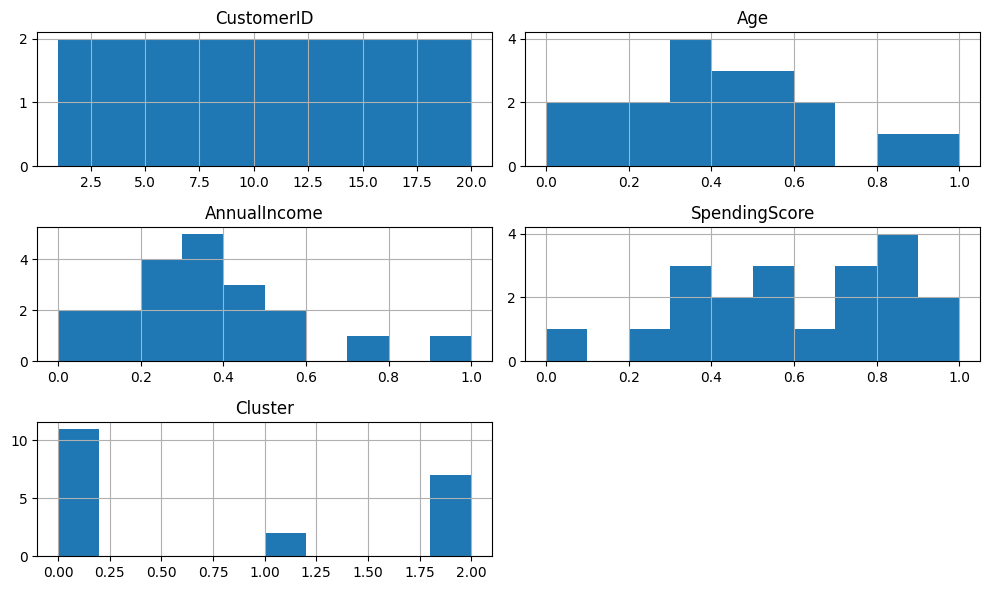

In [28]:
# Example code for histograms
data.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.title('Feature Distributions')
plt.show()

## Clusters Visualization
Scatter plot showing the clusters based on AnnualIncome and SpendingScore:

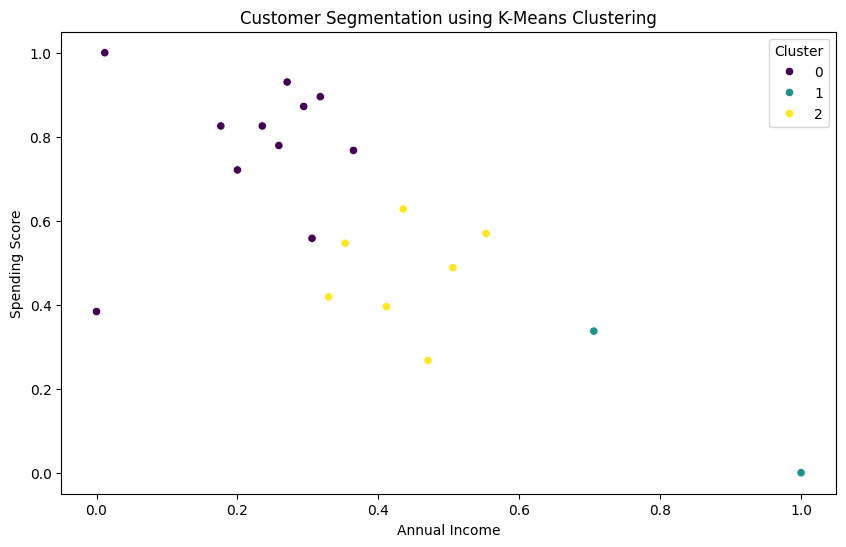

In [29]:
# Example code for scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

## Elbow Method and Silhouette Score Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

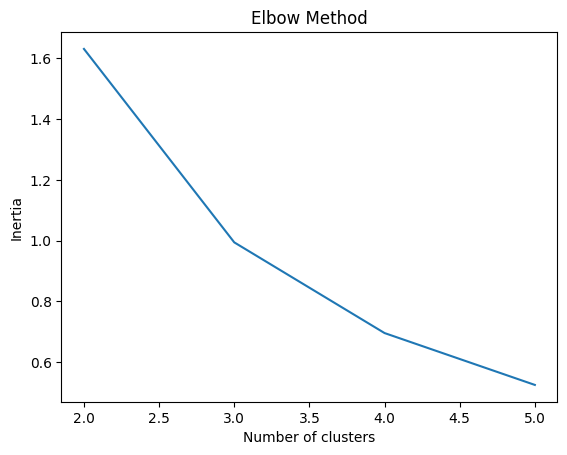

In [44]:
# Initialize an empty list to store inertia values
inertia = []

# Loop over a range of k values
for i in range(2, 6):  # k values from 2 to 5
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['Age', 'AnnualIncome', 'SpendingScore']])
    inertia.append(kmeans.inertia_)  # Append the inertia for this k

# Now plot the elbow method
plt.plot(range(2, 6), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

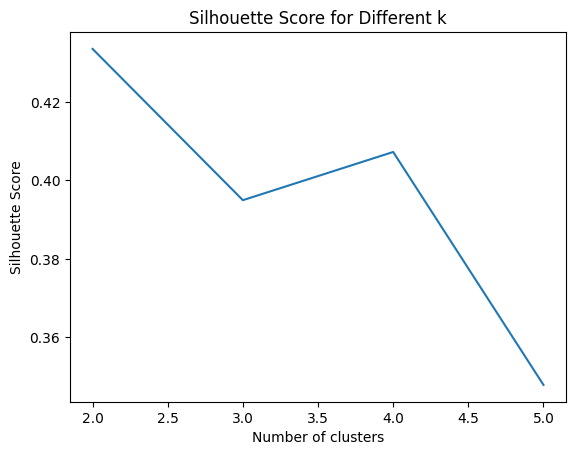

In [46]:
from sklearn.metrics import silhouette_score

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Loop over a range of k values
for i in range(2, 6):  # k values from 2 to 5
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['Age', 'AnnualIncome', 'SpendingScore']])
    labels = kmeans.labels_
    score = silhouette_score(data[['Age', 'AnnualIncome', 'SpendingScore']], labels)
    silhouette_scores.append(score)  # Append the silhouette score for this k

# Now plot the silhouette scores
plt.plot(range(2, 6), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()